In [1]:
!pip install transformers
!pip install transformers[torch]
!pip install accelerate -U
!pip install datasets
!pip install sentencepiece
!pip install tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.4 MB/s eta 0:00:00


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [35]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


from PIL import Image
image = Image.open(r"/content/drive/MyDrive/AIML_Capstone/Shekhar_Filled Forms/Shekhar PNG/Enrollment_Arnold_Passalacqua.png")
#image.show()

# DONUT_SMART Dataset

In [3]:
from huggingface_hub import notebook_login

notebook_login()

In [36]:
data_path = '/content/drive/MyDrive/AimlCapProj2023/smartenroll/'

In [37]:
import os
os.getcwd()

'/content/drive/My Drive/AimlCapProj2023/smartenroll'

In [38]:
os.chdir(data_path)
os.getcwd()

'/content/drive/MyDrive/AimlCapProj2023/smartenroll'

In [ ]:
# clone repository
!git clone https://github.com/zzzDavid/ICDAR-2019-SROIE.git

#https://github.com/ShekDass/SMART2023.git

# copy data
!cp -r ICDAR-2019-SROIE/data ./

# clean up
#rm -rf ICDAR-2019-SROIE
#rm -rf data/box
import shutil
shutil.rmtree('ICDAR-2019-SROIE')
shutil.rmtree('data/box')

Cloning into 'ICDAR-2019-SROIE'...
remote: Enumerating objects: 2386, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 2386 (delta 18), reused 18 (delta 18), pack-reused 2366
Receiving objects: 100% (2386/2386), 278.64 MiB | 31.93 MiB/s, done.
Resolving deltas: 100% (239/239), done.
Updating files: 100% (1980/1980), done.


In [39]:
import os
import json
from pathlib import Path
import shutil

# define paths
base_path = Path("data")
print(base_path)


print(os.getcwd())

data
/content/drive/MyDrive/AimlCapProj2023/smartenroll


In [40]:
metadata_path = base_path.joinpath("key")
image_path = base_path.joinpath("img")
# define metadata list
metadata_list = []

In [41]:
# parse metadata
for file_name in metadata_path.glob("*.json"):
  print(file_name)
  with open(file_name, "r") as json_file:
    # load json file
    data = json.load(json_file)
    # create "text" column with json string
    text = json.dumps(data)
    # add to metadata list if image exists
    if image_path.joinpath(f"{file_name.stem}.png").is_file():
      metadata_list.append({"text":text,"file_name":f"{file_name.stem}.png"})
      # delete json file

# write jsonline file
with open(image_path.joinpath('metadata.jsonl'), 'w') as outfile:
    for entry in metadata_list:
        json.dump(entry, outfile)
        outfile.write('\n')

# remove old meta data
shutil.rmtree(metadata_path)

data/key/1_Andrew_Klyuchnikova.json
data/key/2_Arnold_Passalacqua.json


In [42]:
import os
import json
from pathlib import Path
import shutil
from datasets import load_dataset

# define paths
base_path = Path("data")
metadata_path = base_path.joinpath("key")
image_path = base_path.joinpath("img")

# Load dataset
dataset = load_dataset("imagefolder", data_dir=image_path, split="train")

print(f"Dataset has {len(dataset)} images")
print(f"Dataset features are: {dataset.features.keys()}")

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-61ec5da6988846c2/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.
Dataset has 2 images
Dataset features are: dict_keys(['image', 'text'])


Random sample is 1
OCR text is {"image_id": "2", "Section1": [{"insurancecompany": "HIGHMARK", "formheader": "ENROLLMENT/WAIVER FORM", "formsectionI": "I EMPLOYEE/CONTRACT HOLDER INFORMATION (Must be completed for both enrollees and waivers", "Effective Date": "06/01/2023", "Employer/Group Name": "UNITED PARCEL SERVICE", "Group Number": "17381991", "Payroll Location": " ", "First Name": "ARNOLD", "MI": " ", "Last Name": "PASSALACQUA", "Social Security Number": "114-91-3731", "Address": "535 PARK AVE E", "City": "PRINCETON", "State": "VT", "Zip": "61356", "County": " ", "Home/Cell Phone": "765-239-9678", "Marital Status (Please check one)": "Divorced", "Enrollment Status": "Rehired Employee", "Full-Time Hire (or Rehire) Date (Month/Day/Year)": "10/23/2001", "Hours Worked Per Week": "40", "Gender": "Male", "Date of Birth (Month/Day/Year)": "05/16/1956", "Age": "67", "Product Selection(s)": "Vision"}], "Section2": [{"formsectionII": "II DEPENDENT INFORMATION (If enrolling more than four d

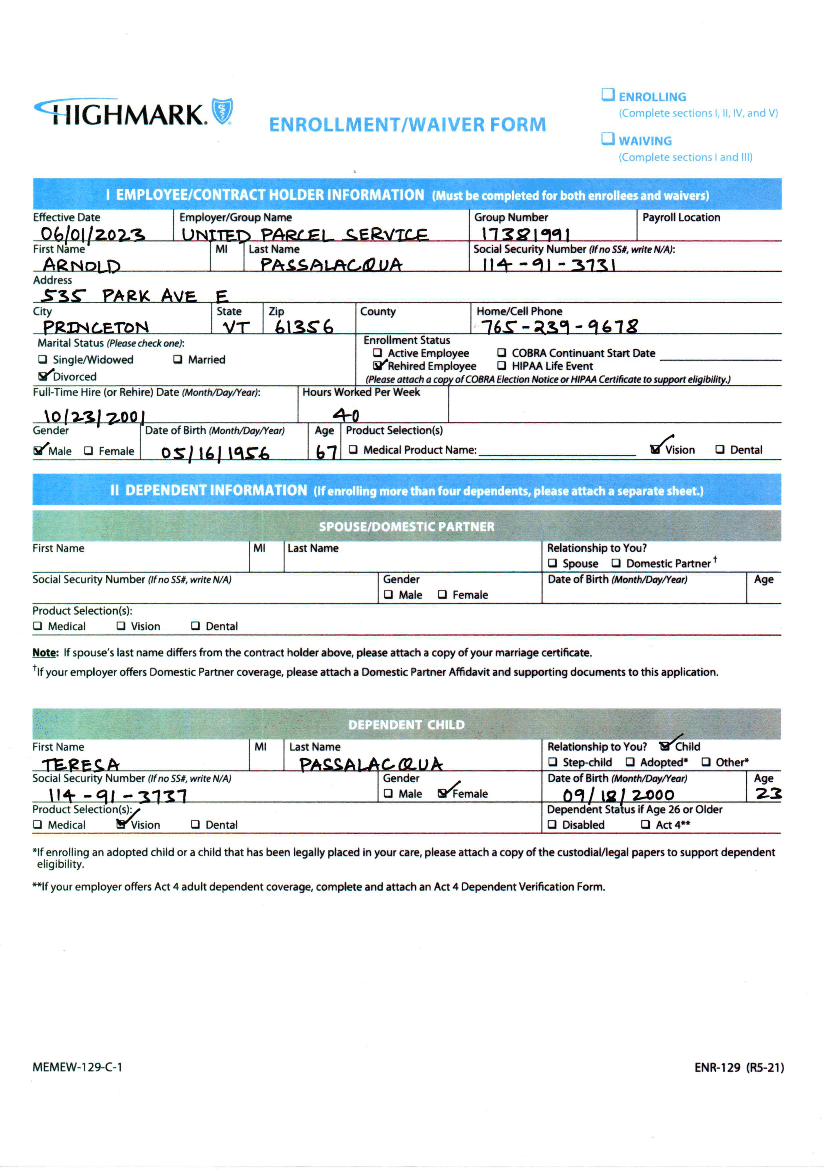

In [45]:
import random

random_sample = random.randint(0, len(dataset))

print(f"Random sample is {random_sample}")
print(f"OCR text is {dataset[random_sample]['text']}")
dataset[random_sample]['image'].resize((827,1169))

In [50]:
# JSON to TOKEN 1

new_special_tokens = [] # new tokens which will be added to the tokenizer
task_start_token = "<s>"  # start of task token
eos_token = "</s>" # eos token of tokenizer

def json2token(obj, update_special_tokens_for_json_key: bool = True, sort_json_key: bool = True):
    """
    Convert an ordered JSON object into a token sequence
    """
    if type(obj) == dict:
        if len(obj) == 1 and "text_sequence" in obj:
            return obj["text_sequence"]
        else:
            output = ""
            if sort_json_key:
                keys = sorted(obj.keys(), reverse=True)
            else:
                keys = obj.keys()
            for k in keys:
                if update_special_tokens_for_json_key:
                    new_special_tokens.append(fr"<s_{k}>") if fr"<s_{k}>" not in new_special_tokens else None
                    new_special_tokens.append(fr"</s_{k}>") if fr"</s_{k}>" not in new_special_tokens else None
                output += (
                    fr"<s_{k}>"
                    + json2token(obj[k], update_special_tokens_for_json_key, sort_json_key)
                    + fr"</s_{k}>"
                )
            return output
    elif type(obj) == list:
        return r"<sep/>".join(
            [json2token(item, update_special_tokens_for_json_key, sort_json_key) for item in obj]
        )
    else:
        # excluded special tokens for now
        obj = str(obj)
        if f"<{obj}/>" in new_special_tokens:
            obj = f"<{obj}/>"  # for categorical special tokens
        return obj

In [53]:
# Preprocess Image and Text for DONUT 1

def preprocess_documents_for_donut(sample):
    # create Donut-style input
    text = json.loads(sample["text"])
    d_doc = task_start_token + json2token(text) + eos_token
    # convert all images to RGB
    image = sample["image"].convert('RGB')
    return {"image": image, "text": d_doc}

num_samples = 2
proc_dataset = dataset.select(range(num_samples)).map(preprocess_documents_for_donut)

print(f"Sample: {proc_dataset[1]['text']}")
print(f"New special tokens: {new_special_tokens + [task_start_token] + [eos_token]}")

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

Sample: <s><s_image_id>2</s_image_id><s_Section3><s_Social Security Number>114-91-3737</s_Social Security Number><s_Relationship to You?>Child</s_Relationship to You?><s_Product Selection(s)>Vision</s_Product Selection(s)><s_MI> </s_MI><s_Last Name>PASSALACQUA</s_Last Name><s_Gender>Female</s_Gender><s_First Name>TERESA</s_First Name><s_Dependent2>DEPENDENT CHILD</s_Dependent2><s_Dependent Status if Age 26 or Older> </s_Dependent Status if Age 26 or Older><s_Date of Birth (Month/Day/Year)>09/18/2000</s_Date of Birth (Month/Day/Year)><s_Age>23</s_Age></s_Section3><s_Section2><s_formsectionII>II DEPENDENT INFORMATION (If enrolling more than four dependents, please attach a separate sheet)</s_formsectionII><s_Social Security Number> </s_Social Security Number><s_Relationship to You?> </s_Relationship to You?><s_Product Selection(s)> </s_Product Selection(s)><s_MI> </s_MI><s_Last Name> </s_Last Name><s_Gender> </s_Gender><s_First Name> </s_First Name><s_Dependent1>SPOUSE/DOMESTIC PARTNER</

In [46]:
# JSON to TOKEN 2

new_special_tokens = [] # new tokens which will be added to the tokenizer
task_start_token = "<s>"  # start of task token
eos_token = "</s>" # eos token of tokenizer

def json2token(obj, update_special_tokens_for_json_key=True, sort_json_key=True):
    """
    Convert an ordered JSON object into a token sequence
    """
    temp_special_tokens = set()  # Temporary set to store special tokens
    tokens = []
    if isinstance(obj, dict):
        if len(obj) == 1 and "text_sequence" in obj:
            return obj["text_sequence"]
        else:
            if sort_json_key:
                keys = sorted(obj.keys(), reverse=True)
            else:
                keys = obj.keys()
            for k in keys:
                if update_special_tokens_for_json_key:
                    temp_special_tokens.add(fr"<s_{k}>")
                    temp_special_tokens.add(fr"</s_{k}>")
                tokens.append(fr"<s_{k}>")
                tokens.append(json2token(obj[k], update_special_tokens_for_json_key, sort_json_key))
                tokens.append(fr"</s_{k}>")
    elif isinstance(obj, list):
        tokens.extend(json2token(item, update_special_tokens_for_json_key, sort_json_key) for item in obj)
    else:
        obj = str(obj)
        if f"<{obj}/>" in temp_special_tokens:
            obj = f"<{obj}/>"
        tokens.append(obj)
    new_special_tokens.extend(list(temp_special_tokens))  # Convert set back to a list
    return "<sep/>".join(tokens)

In [ ]:
# Preprocess Image and Text for DONUT 2

def preprocess_documents_for_donut(sample):
    try:
        # create Donut-style input
        text = json.loads(sample)["text"]
        d_doc = task_start_token + json2token(text) + eos_token

        # convert all images to RGB
        image = sample["image"].convert('RGB')
        return {"image": image, "text": d_doc}

    except (json.JSONDecodeError, KeyError):
        return None  # Skip the sample if there is an error

BATCH_SIZE = 2
num_samples = len(dataset)
for i in range(0, num_samples, BATCH_SIZE):
    batch = dataset[i:i+BATCH_SIZE]
    processed_samples = [preprocess_documents_for_donut(json.loads(sample)) for sample in batch]

In [54]:
# Load Donut Processor

from transformers import DonutProcessor

# Load processor
processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base")

# add new special tokens to tokenizer
processor.tokenizer.add_special_tokens({"additional_special_tokens": new_special_tokens + [task_start_token] + [eos_token]})

# we update some settings which differ from pretraining; namely the size of the images + no rotation required
# resizing the image to smaller sizes from [1920, 2560] to [960,1280]
processor.feature_extractor.size = [720,960] # should be (width, height)
processor.feature_extractor.do_align_long_axis = False

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


/usr/local/lib/python3.10/dist-packages/transformers/models/donut/processing_donut.py:186: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [55]:
# Tokenize Text and Image to Tensors

def transform_and_tokenize(sample, processor=processor, split="train", max_length=512, ignore_id=-100):
    # create tensor from image
    try:
        pixel_values = processor(
            sample["image"], random_padding=split == "train", return_tensors="pt"
        ).pixel_values.squeeze()
    except Exception as e:
        print(sample)
        print(f"Error: {e}")
        return {}

    # tokenize document
    input_ids = processor.tokenizer(
        sample["text"],
        add_special_tokens=False,
        max_length=max_length,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    )["input_ids"].squeeze(0)

    labels = input_ids.clone()
    labels[labels == processor.tokenizer.pad_token_id] = ignore_id  # model doesn't need to predict pad token
    return {"pixel_values": pixel_values, "labels": labels, "target_sequence": sample["text"]}

# need at least 32-64GB of RAM to run this
processed_dataset = proc_dataset.map(transform_and_tokenize,remove_columns=["image","text"])

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

In [56]:
processed_dataset = processed_dataset.train_test_split(test_size=0.1)
print(processed_dataset)

DatasetDict({
    train: Dataset({
        features: ['pixel_values', 'labels', 'target_sequence'],
        num_rows: 1
    })
    test: Dataset({
        features: ['pixel_values', 'labels', 'target_sequence'],
        num_rows: 1
    })
})


In [57]:
# Transfer Learn Weights from DONUT Base Model

import torch
from transformers import VisionEncoderDecoderModel, VisionEncoderDecoderConfig

# Load model from huggingface.co
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base")

# Resize embedding layer to match vocabulary size
new_emb = model.decoder.resize_token_embeddings(len(processor.tokenizer))
print(f"New embedding size: {new_emb}")
# Adjust our image size and output sequence lengths
model.config.encoder.image_size = processor.feature_extractor.size[::-1] # (height, width)
model.config.decoder.max_length = len(max(processed_dataset["train"]["labels"], key=len))

# Add task token for decoder to start
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids(['<s>'])[0]

New embedding size: Embedding(57593, 1024)


/usr/local/lib/python3.10/dist-packages/transformers/models/donut/processing_donut.py:186: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [59]:
# Define Hyperparameters

from transformers import Trainer
from huggingface_hub import HfFolder
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

# hyperparameters used for multiple args
hf_repository_id = "donut-base-smartentroll"

# Arguments for training
training_args = Seq2SeqTrainingArguments(
    output_dir=hf_repository_id,
    num_train_epochs=3,
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    weight_decay=0.01,
    fp16=True,
    logging_steps=100,
    save_total_limit=2,
    evaluation_strategy="no",
    save_strategy="epoch",
    predict_with_generate=True,
    # push to hub parameters
    report_to="tensorboard",
    push_to_hub=True,
    hub_strategy="every_save",
    hub_model_id=hf_repository_id,
    hub_token=HfFolder.get_token(),
)

# Create Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset["train"],
)

Cloning https://huggingface.co/ShekDass/donut-base-smartentroll into local empty directory.


In [63]:
trainer.train()

Step,Training Loss


Several commits (3) will be pushed upstream.


TrainOutput(global_step=3, training_loss=15.331306457519531, metrics={'train_runtime': 174.7509, 'train_samples_per_second': 0.017, 'train_steps_per_second': 0.017, 'total_flos': 5276663411097600.0, 'train_loss': 15.331306457519531, 'epoch': 3.0})

In [ ]:
# Save processor and create model card
processor.save_pretrained(hf_repository_id)
trainer.create_model_card()
trainer.push_to_hub()

In [ ]:
# Evaluate Model

import re
import transformers
from PIL import Image
from transformers import DonutProcessor, VisionEncoderDecoderModel
import torch
import random
import numpy as np

# hide logs
transformers.logging.disable_default_handler()

# Load our model from Hugging Face
processor = DonutProcessor.from_pretrained("ShekDass/donut-base-smartentroll")
model = VisionEncoderDecoderModel.from_pretrained("ShekDass/donut-base-smartentroll")

# Move model to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Load random document image from the test set
test_sample = processed_dataset["test"][random.randint(1, 5)]

def run_prediction(sample, model=model, processor=processor):
    # prepare inputs
    pixel_values = torch.tensor(test_sample["pixel_values"]).unsqueeze(0)
    task_prompt = "<s>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids

    # run inference
    outputs = model.generate(
        pixel_values.to(device),
        decoder_input_ids=decoder_input_ids.to(device),
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=1,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )

    # process output
    prediction = processor.batch_decode(outputs.sequences)[0]
    prediction = processor.token2json(prediction)

    # load reference target
    target = processor.token2json(test_sample["target_sequence"])
    return prediction, target

prediction, target = run_prediction(test_sample)
print(f"Reference:\n {target}")
print(f"Prediction:\n {prediction}")
processor.feature_extractor.to_pil_image(np.array(test_sample["pixel_values"])).resize((350,600))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1259: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


Reference:
 {'total': '73.00', 'date': '20/12/2017', 'company': 'LIGHTROOM GALLERY SDN BHD', 'address': 'NO: 28, JALAN ASTANA 1C, BANDAR BUKIT RAJA, 41050 KLANG SELANGOR D.E, MALAYSIA'}
Prediction:
 {'text_sequence': '<s><s><s><s><s><s><s><s> LIGHTROM GALLERY SDN BHD No: 28. JALAN STANA IC, BANDART BKT A, 41600 KLANG SEANG SEANG D.E. MALAYSIA-A ROC:(10/252A-A-A-A-A-A-A-A- GST No: 000564/09/00 Stadion Stadion Stadion Stadion Stadion Stadion 4395 Fax:103-3362 4395 FAX:08-83-83-83-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A-A

/usr/local/lib/python3.10/dist-packages/transformers/models/donut/processing_donut.py:186: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 56>:56                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'DonutImageProcessor' object has no attribute 'to_pil_image'